In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [8]:
date = "09-20-24"
data_location = rf"E:\Project 6 - Temperature\Experiments\data_analysis\{date}"

# Load all data combined

In [9]:
all_data = pd.read_csv(data_location + rf"\{date}_all_features_combined.csv")
all_data["CYCLE_STR"] = all_data["CYCLE"].astype(str)
all_data["POSITION_STR"] = all_data["POSITION"].astype(str)

In [10]:
# Row 1
peaks_row_1 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] <= 13)]
troughs_row_1 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] <= 13)]
# Row 2
peaks_row_2 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] > 13) & (all_data["POSITION"] <= 27)]
troughs_row_2 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] > 13) & (all_data["POSITION"] <= 27)]
# Row 3
peaks_row_3 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] > 27)]
troughs_row_3 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] > 27)]

# Visualize data before renumbering

In [11]:
px.scatter(peaks_row_1, x="TIME", y="MEAN_TEMPERATURE", color="CYCLE_STR", 
           hover_data=["POSITION_STR"], range_x=[-10, 700])

In [12]:
px.scatter(troughs_row_1, x="TIME", y="MEAN_TEMPERATURE", color="CYCLE_STR",
           hover_data=["POSITION_STR"], range_x=[-10, 700])

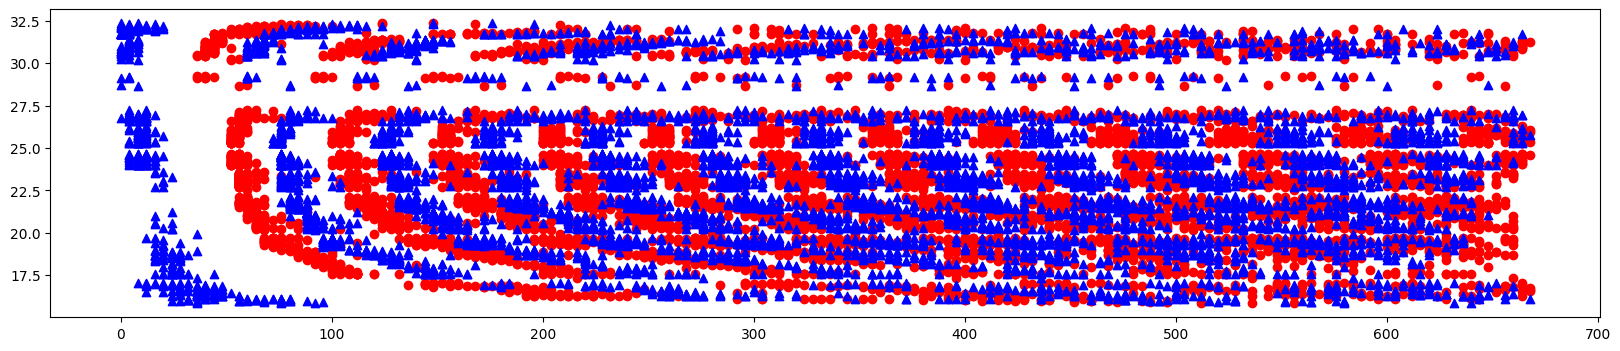

In [13]:
# Plot peaks as circles and troughs as triangles
fig, ax = plt.subplots(figsize=(20, 4))
ax.scatter(peaks_row_1["TIME"], peaks_row_1["MEAN_TEMPERATURE"], color="red", marker="o", label="Peaks")
ax.scatter(troughs_row_1["TIME"], troughs_row_1["MEAN_TEMPERATURE"], color="blue", marker="^", label="Troughs")
plt.show()

In [14]:
px.scatter(peaks_row_2, x="TIME", y="MEAN_TEMPERATURE", color="CYCLE_STR",
           hover_data=["POSITION_STR", "TRACK_ID"])

In [15]:
px.scatter(troughs_row_2, x="TIME", y="MEAN_TEMPERATURE", color="CYCLE_STR",
           hover_data=["POSITION_STR"])

In [16]:
px.scatter(peaks_row_3, x="TIME", y="MEAN_TEMPERATURE", color="CYCLE_STR",
              hover_data=["POSITION_STR"])

In [17]:
px.scatter(troughs_row_3, x="TIME", y="MEAN_TEMPERATURE", color="CYCLE_STR",
              hover_data=["POSITION_STR"])

# First round of cycle number fixes

## Peaks

### First round of cycle number fixes

In [18]:
# Track ids per position that need +1 on their cycle number
row_1_selection = peaks_row_1[peaks_row_1["CYCLE"] == 1][["TIME", "TRACK_ID", "POSITION"]]
row_2_selection = peaks_row_2[peaks_row_2["CYCLE"] == 1][["TIME", "TRACK_ID", "POSITION"]]
plus_one_track_ids = {}

for pos in range(10):
    key = f"Pos{pos}"
    value = row_1_selection[(row_1_selection["POSITION"] == pos) & (row_1_selection["TIME"] > 45)]["TRACK_ID"].tolist()
    plus_one_track_ids[key] = value

In [19]:
# Get all indices where we need to add 1 to the cycle number 
indices_to_add = []
peaks = all_data[all_data["TYPE"] == "PEAK"]
for pos, track_ids in plus_one_track_ids.items():
    for track_id in track_ids:
        indices = peaks[(peaks["POSITION"] == int(pos[3:])) & (peaks["TRACK_ID"] == track_id)].index.tolist()
        indices_to_add.extend(indices)

all_data.loc[indices_to_add, "CYCLE"] = all_data.loc[indices_to_add, "CYCLE"] + 1
all_data["CYCLE_STR"] = all_data["CYCLE"].astype(str)
all_data["POSITION_STR"] = all_data["POSITION"].astype(str)

In [20]:
# For row 2 add 1 to the cycle number of peaks for positions 15 through 22
row_2_selection = peaks_row_2[peaks_row_2["CYCLE"] == 1][["TIME", "TRACK_ID", "POSITION"]]
for pos in range(15, 23):
    # peaks = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] == pos)]
    # Any peak with a first cycle that happens after 100 minutes, add 1
    track_ids = row_2_selection[(row_2_selection["POSITION"] == pos) & (row_2_selection["TIME"] > 100)]["TRACK_ID"].tolist()
    for track_id in track_ids:
        indices = peaks[(peaks["POSITION"] == pos) & (peaks["TRACK_ID"] == track_id)].index.tolist()
        all_data.loc[indices, "CYCLE"] = all_data.loc[indices, "CYCLE"] + 1
    # peaks_indices = peaks.index.tolist()
    # all_data.loc[peaks_indices, "CYCLE"] = all_data.loc[peaks_indices, "CYCLE"] + 1
all_data["CYCLE_STR"] = all_data["CYCLE"].astype(str)
all_data["POSITION_STR"] = all_data["POSITION"].astype(str)

### Second round of fixes

### Check result

In [21]:
# Row 1
peaks_row_1 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] <= 13)]
troughs_row_1 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] <= 13)]
# Row 2
peaks_row_2 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] > 13)]
troughs_row_2 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] > 13)]
# Row 3
peaks_row_3 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] > 27)]
troughs_row_3 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] > 27)]

In [22]:
px.scatter(troughs_row_2, x="TIME", y="MEAN_TEMPERATURE", color="CYCLE_STR",
           hover_data=["POSITION_STR", "TRACK_ID"],)

## Troughs

In [23]:
# Row 1
peaks_row_1 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] <= 13)]
troughs_row_1 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] <= 13)]
# Row 2
peaks_row_2 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] > 13)]
troughs_row_2 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] > 13)]

In [24]:
# plot troughs of pos
pos = 2
px.scatter(troughs_row_1[troughs_row_1["POSITION"] == pos], x="TIME", y="MEAN_TEMPERATURE", color="CYCLE_STR",
           hover_data=["TRACK_ID"])

### Renumber

In [25]:
# Track ids per position that need +1 on their cycle number
row_1_selection = troughs_row_1[troughs_row_1["CYCLE"] == 1][["TIME", "TRACK_ID", "POSITION"]]
plus_one_track_ids = {
    # Row 1
    'Pos1': row_1_selection[(row_1_selection["POSITION"] == 1) & (row_1_selection["TIME"] > 100)]["TRACK_ID"].tolist(),
    'Pos2': row_1_selection[(row_1_selection["POSITION"] == 2) & (row_1_selection["TIME"] > 100)]["TRACK_ID"].tolist(),
    'Pos3': row_1_selection[(row_1_selection["POSITION"] == 3) & (row_1_selection["TIME"] > 50)]["TRACK_ID"].tolist(),
    'Pos4': row_1_selection[(row_1_selection["POSITION"] == 4) & (row_1_selection["TIME"] > 50)]["TRACK_ID"].tolist(),
    'Pos5': row_1_selection[(row_1_selection["POSITION"] == 5) & (row_1_selection["TIME"] > 50)]["TRACK_ID"].tolist(),
    'Pos6': row_1_selection[(row_1_selection["POSITION"] == 6) & (row_1_selection["TIME"] > 50)]["TRACK_ID"].tolist(),
    'Pos12': row_1_selection[(row_1_selection["POSITION"] == 12) & (row_1_selection["TIME"] > 30)]["TRACK_ID"].tolist(),
}

In [26]:
# Get all indices where we need to add 1 to the cycle number 
indices_to_add = []
troughs = all_data[all_data["TYPE"] == "TROUGH"]
for pos, track_ids in plus_one_track_ids.items():
    for track_id in track_ids:
        indices = troughs[(troughs["POSITION"] == int(pos[3:])) & (troughs["TRACK_ID"] == track_id)].index.tolist()
        indices_to_add.extend(indices)

all_data.loc[indices_to_add, "CYCLE"] = all_data.loc[indices_to_add, "CYCLE"] + 1
all_data["CYCLE_STR"] = all_data["CYCLE"].astype(str)
all_data["POSITION_STR"] = all_data["POSITION"].astype(str)

## Second round

In [27]:
# Add +1 to all cycles on positions 0 through 9
for pos in range(10):
    position = all_data[(all_data["POSITION"] == pos) & (all_data["TYPE"] == "TROUGH")].index.tolist()
    all_data.loc[position, "CYCLE"] = all_data.loc[position, "CYCLE"] + 1

all_data["CYCLE_STR"] = all_data["CYCLE"].astype(str)
all_data["POSITION_STR"] = all_data["POSITION"].astype(str)

### Check result

In [28]:
# Row 1
peaks_row_1 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] <= 13)]
troughs_row_1 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] <= 13)]
# Row 2
peaks_row_2 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] > 13) & (all_data["POSITION"] <= 27)]
troughs_row_2 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] > 13) & (all_data["POSITION"] <= 27)]
# Row 3
peaks_row_3 = all_data[(all_data["TYPE"] == "PEAK") & (all_data["POSITION"] > 27)]
troughs_row_3 = all_data[(all_data["TYPE"] == "TROUGH") & (all_data["POSITION"] > 27)]

In [29]:
px.scatter(peaks_row_2, x="TIME", y="MEAN_TEMPERATURE", color="CYCLE_STR",
           hover_data=["POSITION_STR", "TRACK_ID"],)

# Save result

In [44]:
all_data.to_csv(data_location + rf"\{date}_all_features_combined_renumbered.csv", index=False)